<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Препроцессинг-данных" data-toc-modified-id="Препроцессинг-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Препроцессинг данных</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Прогназирование оттока клиентов

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
#pip install -U seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split #
#from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Для выполнения задачи прогнозирования мы будем работать с историческими данными банка. Наш датасет состоит из 10000 записей и 14 колонок. Типы данных проставлены корректно, **есть пропушенные значение в колонке Tenure**. Давайте проверим количественные переменные на предмет выбросов. 

**Описание данных**

*Признаки*
  
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата  

*Целевой признак*
  
- Exited — факт ухода клиента

In [20]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Данные выглядят реалистично. В препорцессинге необходимо будет масштабировать их. 

In [6]:
data.duplicated().sum()

0

### Пропущенные значения

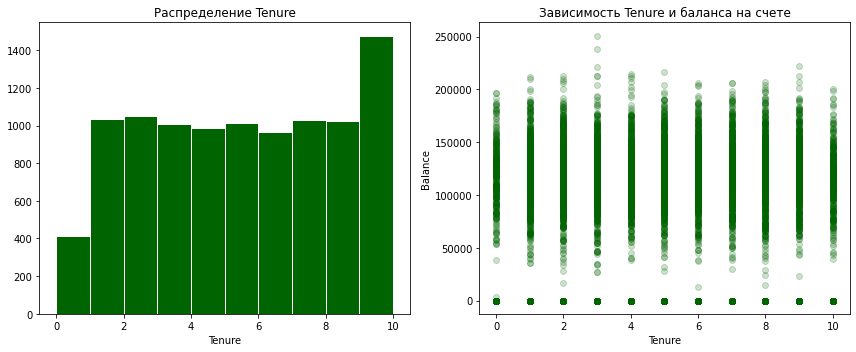

In [10]:
fig, axs = plt.subplots(1,2, figsize = (12,5))

sns.set_style('darkgrid')

axs[1].scatter('Tenure', 'Balance', data=data, color='darkgreen', alpha=.2)
axs[1].set(title='Зависимость Tenure и баланса на счете', xlabel='Tenure', ylabel='Balance')

axs[0].hist(data['Tenure'], color='darkgreen')
axs[0].set(title='Распределение Tenure', xlabel='Tenure')

fig.tight_layout() 
plt.show()

По распределению мы видим, что в нашем датасете примерно одинаковое число клиентов, которые пользуются услугами банка от года и до 9 лет. Болшое кол-во клиентов используют банк уже более 9 лет. Чтобы понять, как мы можем заполнить пропуски в данной категории давайте проверим две гипотезы: 1) возможно, чем больше баланс на счету у человека, тем дольше он пользуется банком - больше доверяет ему, 2) Чем больше человек использует продуктов, тем дольше он пользуется банком.  

Как мы видим по второй диаграмме, наше первое предположение неверно, баланс клиентов, которые использует банк недавно, и старых клиентов находится примерно в одном диапозоне. Давайте проверим нашу вторую гипотезу. 

In [22]:
print('Средние кол-во Tenure в группах, сформированных по кол-ву используемых клиентом продуктов')
data.groupby('NumOfProducts')['Tenure'].mean()

Средние кол-во Tenure в группах, сформированных по кол-ву используемых клиентом продуктов


Вторая наша гипотеза тоже не подтвердилась, поэтому предлагаю заполнить пропуски медианным значением. В данном проекте для обработки переменных я буду использовать pipeline, поэтому заполнение пропусков будет прописываться в нем. 

In [12]:
print('Медианноое значение Tenure: ', data['Tenure'].median())

Медианноое значение Tenure:  5.0


### Вывод

Наши данные готовы к анализу и препроцессингу. Типы данных представленны корректно. Пропущенные значение в колонке Tenure будут заполнены медианным значением - скорее всего пропущенные значения появились из-за технических неполадок. 

## Исследование задачи

Начнем с исследования нашего целевого признака Exited. Это бинарная переменная, где 1 - факт ухода клиента из банка. 

In [23]:
data['Exited'].value_counts()

Как мы видим у нас есть достаточно сильный дисбаланс классов. Оставшихся клиентов в 4 раза больше, чем ушедших - это и хорошо, но необходимо будет учитывать при построение модели и формировании выборок. 

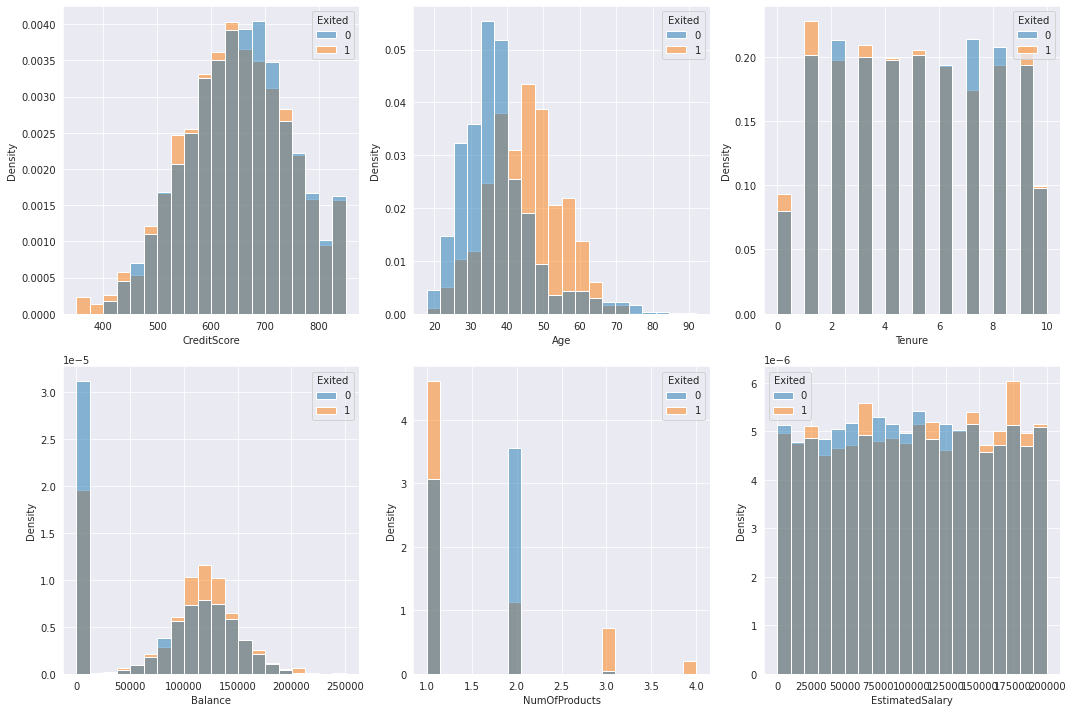

In [14]:
fig, axs = plt.subplots(2,3, figsize = (15,10))

col_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i, col in enumerate(col_num):
    sns.histplot(data=data, x=col, stat='density',
                 bins=20, hue="Exited", 
                 common_norm=False, ax=axs[i//3, i%3]) 
    fig.tight_layout() 

Средний кредитный рейтинг пользователей банка составляет около 650, при этом кредитный рейтинг пользователей, которые остались с банком немного выше, тех кто перестал использовать услуги. Средний возраст клиентов банка - 35-40 лет, стоит обратить внимание, что чаще банком перестают пользоваться люди возраста 40+, ниже на матрице корреляй можно увидеть достаточно сильную зависимость 0.32 между возрастом и уходом из банка.  

Средний показатель баланса на счету составляет 125 000 - данный показатель распределен нормально, если не учитывать достаточно большоое кол-во пользователей, у которых баланс на счету равен нулю. Наиболее часто пользователи банка используют один продукт, и реже всего 4. Давайте немного изучим георгафию наших пользователей. 

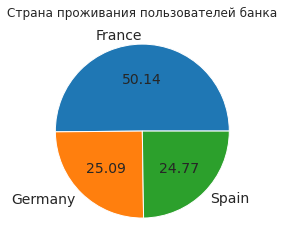

In [15]:
data.groupby('Geography').size().plot(kind='pie', autopct='%.2f',
                                 textprops={'fontsize': 14})
plt.ylabel('')
plt.title('Страна проживания пользователей банка')
plt.show()

Для прогнозирования нам не понадобятся такие данные как id клиента, его фамилия и номер строчки - так как это уникальные показатели, предлагаю создать датасет, с которым мы будем непосредственно работать без них. 

In [16]:
processed_data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

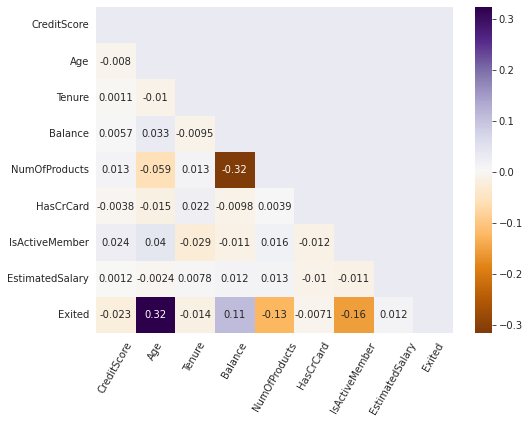

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

corr = processed_data.corr('spearman') 
mask = np.triu(np.ones_like(corr)) 
sns.heatmap(corr, cmap='PuOr', mask=mask, annot=True, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=60);

Как мы уже сказали, на факт ухода из банка достаточно сильно влияет возраст - положительная корреляция 0.32. 

In [28]:
processed_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Препроцессинг данных

Создадим три выборки: обучающую, валидационную и тестовую в соотношении: 3:1:1. Установим при разделении аргумент stratify для того, чтобы в данные делились стратифицированным образом. 

In [29]:
features = processed_data.drop(['Exited'], axis=1)
target = processed_data['Exited']

In [30]:
f_train, f_test_valid, t_train, t_test_valid = train_test_split(features, 
                                                    target, 
                                                    test_size=.4, 
                                                    random_state=12345,
                                                    stratify=target)

In [31]:
f_train.shape

(6000, 10)

In [32]:
f_test, f_valid, t_test, t_valid = train_test_split(f_test_valid, 
                                                    t_test_valid, 
                                                    test_size=.5, 
                                                    random_state=12345,
                                                    stratify=t_test_valid)

In [33]:
f_test.shape

(2000, 10)

Выделим отдельно категориальные и количественные признаки - создадим для них разный пайлайны.

In [34]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']

categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

**Для категориальных**: используем метод OHE для кодировки переменных, уберем первые колонки, чтобы избежать дамми-ловушки  
**Для количественных**: с помощью imputer - заполним пропущенные значения медианными (пропущенные значения у нас только в Tenure) и также сделаем маштабирование признаков. 

In [35]:
# Define categorical pipeline
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(sparse=False, drop='first'))
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit column transformer to training data
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

Мы решаем задачу классификации. Для начала давайте посмотрим как с ней справится логистическая регрессия без взвешивания классов. 

In [36]:
# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=12345))
])
pipe.fit(f_train, t_train)

# Predict training data
train_pred_unbalanced = pipe.predict(f_train)
print('F1 score на обучающей выборке', f1_score(t_train, train_pred_unbalanced))

# Predict valid data
valid_pred_unbalanced = pipe.predict(f_valid)
print('F1 score на валидационной выборке', f1_score(t_valid, valid_pred_unbalanced))

F1 score на обучающей выборке 0.3184019370460049
F1 score на валидационной выборке 0.2932330827067669


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import shuffle

[[1546   47]
 [ 329   78]]


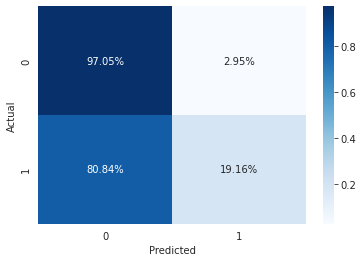

In [38]:
cm = confusion_matrix(t_valid, valid_pred_unbalanced)

df_cm = pd.DataFrame(cm/cm.sum(axis=1)[:, np.newaxis].round(2), columns=[0,1], index = [0,1])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(cm)
sns.heatmap(df_cm, annot=True, fmt='.2%', cmap='Blues');

Модель без взвешивания классов попала только в 19% процентов случаев в уходящего клиента. Давайте построим логистическую регрессию с взвешиванием классов и посмотрим как она справиласт с этой задачей. 

In [39]:
# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=12345, class_weight='balanced'))
])
pipe.fit(f_train, t_train)

# Predict training data
train_pred_balanced = pipe.predict(f_train)
print('F1 score на обучающей выборке - модель с взвешиванием классов',f1_score(t_train, train_pred_balanced))

# Predict valid data
valid_pred_balanced = pipe.predict(f_valid)
print('F1 score на валидационной выборке - модель с взвешиванием классов',f1_score(t_valid, valid_pred_balanced))

F1 score на обучающей выборке - модель с взвешиванием классов 0.4873900293255133
F1 score на валидационной выборке - модель с взвешиванием классов 0.4756944444444445


[[1122  471]
 [ 133  274]]


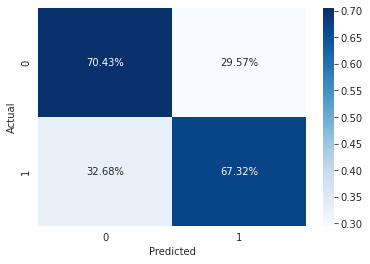

In [40]:
cm = confusion_matrix(t_valid, valid_pred_balanced)

df_cm = pd.DataFrame(cm/cm.sum(axis=1)[:, np.newaxis].round(2), columns=[0,1], index = [0,1])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(cm)
sns.heatmap(df_cm, annot=True, fmt='.2%', cmap='Blues');

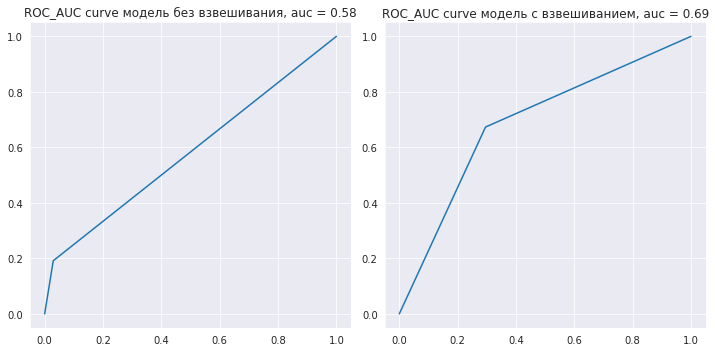

In [41]:
fpr_un, tpr_un, thr_un = roc_curve(t_valid, valid_pred_unbalanced)
auc_un = roc_auc_score(t_valid, valid_pred_unbalanced)

fpr_b, tpr_b, thr_b = roc_curve(t_valid, valid_pred_balanced)
auc_b = roc_auc_score(t_valid, valid_pred_balanced)

fig, axs = plt.subplots(1,2, figsize = (10,5))
axs[0].plot(fpr_un, tpr_un)
axs[0].set_title(f"ROC_AUC curve модель без взвешивания, auc = {auc_un:.2f}")

axs[1].plot(fpr_b, tpr_b)
axs[1].set_title(f"ROC_AUC curve модель с взвешиванием, auc = {auc_b:.2f}")

fig.tight_layout()
plt.show()

Стало значительно лучше - **f1 score 0.48 на валидационной выборке, 67% попавдани в таргет**. Также мы видим, что ROC-AUC у второй модели вырос, да и по графику заметно, что прямая отдалилась от ROC-прямой случайной модели, которая проходила бы ровно по горизонатали. Но даже логистическая регрессия с взвешенными классами все еще недостаточно качественно делает предсказания, давайте попробуем обучить модель случайного леса. 

## Борьба с дисбалансом

Для того, чтобы решить проблемы с дисбалансом классов сделаем upsampling

In [42]:
f_train, f_test_valid, t_train, t_test_valid = train_test_split(features, 
                                                    target, 
                                                    test_size=.4, 
                                                    random_state=12345,
                                                    stratify=target)

f_test, f_valid, t_test, t_valid = train_test_split(f_test_valid, 
                                                    t_test_valid, 
                                                    test_size=.5, 
                                                    random_state=12345,
                                                    stratify=t_test_valid)


features_zeros = f_train[t_train == 0]
features_ones = f_train[t_train == 1]
target_zeros = t_train[t_train == 0]
target_ones = t_train[t_train == 1]

repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 10)
(9666,)


In [43]:
target_upsampled.value_counts()

## Подбор гиперпараметров

In [44]:
best_pipe = None
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 100, 10):
    for depth in range (1, 50):
        pipe = Pipeline([('preprocessor', preprocessor),
                         ('model', RandomForestClassifier(random_state=12345, 
                                                          n_estimators=est, max_depth=depth))])
        pipe.fit(features_upsampled, target_upsampled)
        vaild_pred = pipe.predict(f_valid)
        result = f1_score(t_valid, vaild_pred)
        if result > best_result:
            best_pipe = pipe
            best_result = result
            best_est = est
            best_depth = depth

print("f1 score наилучшей модели на валидационной выборке:", best_result,\
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)

f1 score наилучшей модели на валидационной выборке: 0.6116611661166117 Количество деревьев: 30 Максимальная глубина: 49


In [45]:
train_pred_final = best_pipe.predict(features_upsampled)
print('f1 score на тестовой выборке: ', f1_score(target_upsampled, train_pred_final))

valid_pred_final = best_pipe.predict(f_valid)
print('f1 score на валидационной выборке: ', f1_score(t_valid, valid_pred_final))

f1 score на тестовой выборке:  0.9080992075743543
f1 score на валидационной выборке:  0.6116611661166117


[[1369  224]
 [ 129  278]]


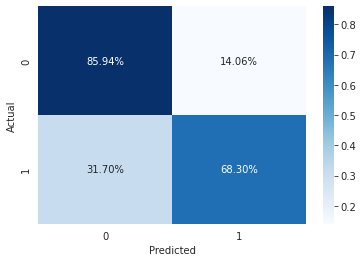

In [46]:
cm = confusion_matrix(t_valid, valid_pred_final)

df_cm = pd.DataFrame(cm/cm.sum(axis=1)[:, np.newaxis].round(2), columns=[0,1], index = [0,1])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(cm)
sns.heatmap(df_cm, annot=True, fmt='.2%', cmap='Blues');

In [47]:
print(classification_report(t_valid, valid_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.55      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



Давайте проверим модель на тестовых данных.  

## Тестирование модели

In [48]:
test_pred_final = best_pipe.predict(f_test)
print('F1 score: ', f1_score(t_test, test_pred_final))

F1 score:  0.6429341963322546


[[1371  221]
 [ 110  298]]


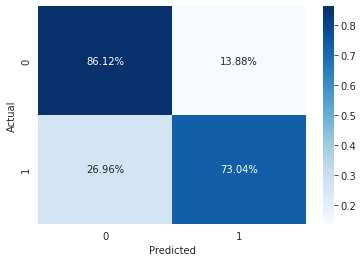

In [49]:
cm = confusion_matrix(t_test, test_pred_final)

df_cm = pd.DataFrame(cm/cm.sum(axis=1)[:, np.newaxis].round(2), columns=[0,1], index = [0,1])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(cm)
sns.heatmap(df_cm, annot=True, fmt='.2%', cmap='Blues');

## Общий вывод: 

Нам удалось создать модель, которая показывает F1-меру 0.61 на валидационной выборке и 0.64 на тестовой. Для этого мы использовали модель случайный лес с гиперпараметрами: количество деревьев - 30, максимальная глубина - 49.   

Помимо этого, во время исследовательского анализа данных была выявлена положительная корреляция между оттоком клиентов и возрастом пользователей - можно более подробно исследовать этот показатель и найти решения, которые позволят более эффективно работать и сохранять клиентов старшего возраста.   

Также, вовремя анализа мы столкнулись с пропущенными значениями в параметре Tenure, возможно, это техническая ошибка, но этот момент стоит уточнить. 